In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,  random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(accuracy_score(y_test, yhat))

(150, 2) (150,)
(120, 2) (30, 2) (120,) (30,)
0.9333333333333333


In [9]:
# Plot the decision boundary
# Creation of the mesh
pl = np.arange(X_test[:,0].min()-0.2, X_test[:,0].max()+0.2,0.01)
pw = np.arange(X_test[:,1].min()-0.2, X_test[:,1].max()+0.2,0.01)
PL, PW = np.meshgrid(pl,pw)
print(PL.shape, PW.shape)
# Convert2D to 1D and concatenate the 2 arrays
formed_data = np.c_[PL.ravel(), PW.ravel()]
ans = model.predict(formed_data)
ans = ans.reshape(PL.shape)
print(ans.shape)

(260, 600) (260, 600)
(260, 600)


In [10]:
# in ans replace setosa with 0, vs with 1, vr with2
mask_setosa = ans == 'setosa'
mask_versicolor = ans == 'versicolor'
mask_virginica = ans == 'virginica'
ans[mask_setosa] = 0.
ans[mask_versicolor] = 1.
ans[mask_virginica] = 2.

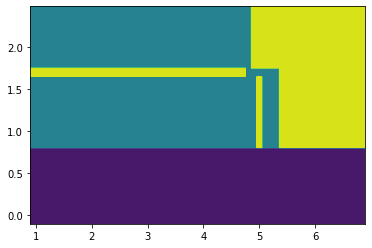

In [11]:
plt.contourf(PL, PW, ans)
plt.show()